Author: Jarno - azzipxonraj \
Date Created: 13-07-2025 \
Date Modified:  \
Description: This jupyter notebook will use machine learning based
on supervised classification data from a MMA database.
Research question: \
Dataset: Imputated MMA dataset - provided by the UMCG 

In [5]:
# libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3
import scipy.stats as stats


In [8]:
# load the data
df = pd.read_csv("imputed_MMA_data_1.csv")
df.drop(columns=df.columns[0], axis=1,  inplace=True)
display(df)
df.shape

,Age,Gender,KR,eGFR,VITB12,MMZ,HB,MCV,MCH,MCHC,...,WBC,PLT,RETI,NEUTRO,LYMFO,MONO,BASO,EO,Iron deficiency,CRP
0,71,0,75.0,69.1186,235.0,190.0,9.7,90.3,1767,19.6,...,7.46,333,49.0,4.81,1.90,0.60,0.03,0.10,1,3.79
1,49,1,116.0,63.2534,242.0,459.7,9.9,102.9,2325,23.3,...,11.55,207,47.0,8.77,1.81,0.84,0.05,0.08,0,6.34
2,51,0,57.0,102.3880,196.0,238.2,7.5,87.0,1674,19.1,...,5.90,323,84.0,2.61,2.65,0.51,0.03,0.10,1,0.83
3,17,0,65.0,126.7880,142.0,71.6,8.1,87.2,1724,19.8,...,7.37,302,40.8,4.33,2.27,0.53,0.05,0.20,1,0.74
4,23,0,53.0,128.3870,353.0,103.9,7.2,85.2,1678,19.7,...,6.36,288,47.0,3.55,2.12,0.58,0.04,0.06,1,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14247,80,1,105.0,58.0000,159.0,316.0,7.5,94.0,1937,20.4,...,7.60,200,43.0,5.88,1.07,0.57,0.02,0.05,0,5.00
14248,82,0,62.0,81.0000,243.0,159.0,7.5,91.0,1767,19.5,...,12.40,568,55.0,9.60,1.70,0.90,0.07,0.08,1,115.00
14249,55,1,81.0,94.0000,394.0,123.0,9.5,92.0,1840,20.0,...,11.40,260,72.0,7.12,2.70,0.84,0.06,0.70,0,0.60
14250,79,1,81.0,81.6758,257.0,275.0,7.4,95.0,1996,20.8,...,7.40,208,58.0,4.78,1.98,0.54,0.04,0.06,0,3.10


(14252, 22)

In [9]:
df.columns.tolist()


['Age',
 'Gender',
 'KR',
 'eGFR',
 'VITB12',
 'MMZ',
 'HB',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'RBC',
 'WBC',
 'PLT',
 'RETI',
 'NEUTRO',
 'LYMFO',
 'MONO',
 'BASO',
 'EO',
 'Iron deficiency',
 'CRP']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14252 entries, 0 to 14251
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              14252 non-null  int64  
 1   Gender           14252 non-null  int64  
 2   KR               14252 non-null  float64
 3   eGFR             14252 non-null  float64
 4   VITB12           14252 non-null  float64
 5   MMZ              14252 non-null  float64
 6   HB               14252 non-null  float64
 7   MCV              14252 non-null  float64
 8   MCH              14252 non-null  int64  
 9   MCHC             14252 non-null  float64
 10  RDW              14252 non-null  float64
 11  RBC              14252 non-null  float64
 12  WBC              14252 non-null  float64
 13  PLT              14252 non-null  int64  
 14  RETI             14252 non-null  float64
 15  NEUTRO           14252 non-null  float64
 16  LYMFO            14252 non-null  float64
 17  MONO        

In [11]:
df.isnull().any()


Age                False
Gender             False
KR                 False
eGFR               False
VITB12             False
MMZ                False
HB                 False
MCV                False
MCH                False
MCHC               False
RDW                False
RBC                False
WBC                False
PLT                False
RETI               False
NEUTRO             False
LYMFO              False
MONO               False
BASO               False
EO                 False
Iron deficiency    False
CRP                False
dtype: bool

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,14252.0,54.133665,22.159817,2.00000,35.000000,55.00000,73.00000,105.000
Gender,14252.0,0.363037,0.480892,0.00000,0.000000,0.00000,1.00000,1.000
KR,14252.0,76.917731,29.901113,17.00000,63.000000,72.00000,85.00000,668.000
eGFR,14252.0,88.494357,24.759471,6.95925,72.495825,88.99585,105.09175,158.786
VITB12,14252.0,267.854975,169.162538,74.00000,190.000000,222.00000,256.00000,1476.000
MMZ,14252.0,309.623716,487.190784,46.00000,163.000000,223.05000,325.12500,19568.600
HB,14252.0,7.919992,1.386385,2.00000,6.800000,7.90000,8.81252,12.000
MCV,14252.0,91.454736,7.600496,55.40000,88.000000,90.80000,94.50000,127.000
MCH,14252.0,1832.642506,210.690047,800.00000,1718.000000,1809.00000,1917.00000,2727.000
MCHC,14252.0,20.003898,1.159794,14.00000,19.500000,19.90000,20.50000,23.300


In [15]:
# Get variable names and dtypes directly from the dataframe
variables = df.columns.tolist()
dtypes_map = {col: str(dtype) for col, dtype in df.dtypes.items()}

# Define units and descriptions based on common medical interpretations
units = {
    'Age': 'years',
    'Gender': 'category', # Assuming 0/1 or Male/Female encoding
    'KR': 'mg/dL', # Assuming Creatinine, common unit
    'eGFR': 'mL/min/1.73m^2', # Estimated Glomerular Filtration Rate
    'VITB12': 'pg/mL', # Picograms per milliliter
    'MMZ': 'category', # Placeholder, needs specific context if not a common abbreviation
    'HB': 'g/dL', # Hemoglobin, grams per deciliter
    'MCV': 'fL', # Mean Corpuscular Volume, femtoliters
    'MCH': 'pg', # Mean Corpuscular Hemoglobin, picograms
    'MCHC': 'g/dL', # Mean Corpuscular Hemoglobin Concentration, grams per deciliter
    'RDW': '%', # Red Cell Distribution Width, percentage
    'RBC': 'x10^6/µL', # Red Blood Cell count, millions per microliter
    'WBC': 'x10^3/µL', # White Blood Cell count, thousands per microliter
    'PLT': 'x10^3/µL', # Platelet count, thousands per microliter
    'RETI': '%', # Reticulocyte count, percentage of RBCs
    'NEUTRO': '%', # Neutrophils, percentage of WBCs
    'LYMFO': '%', # Lymphocytes, percentage of WBCs
    'MONO': '%', # Monocytes, percentage of WBCs
    'BASO': '%', # Basophils, percentage of WBCs
    'EO': '%', # Eosinophils, percentage of WBCs
    'Iron deficiency': 'bool', # Boolean (1=deficient, 0=not deficient)
    'CRP': 'mg/L' # C-Reactive Protein, milligrams per liter
}

descriptions = {
    'Age': 'Age of the patient in years.',
    'Gender': 'Gender of the patient (e.g., 0 for Female, 1 for Male or vice versa).',
    'KR': 'Kidney function marker, likely Creatinine.',
    'eGFR': 'Estimated Glomerular Filtration Rate, a measure of kidney function.',
    'VITB12': 'Vitamin B12 level in the blood.',
    'MMZ': 'Medical measurement or score, specific meaning depends on context.', # Placeholder, requires more info
    'HB': 'Hemoglobin level, indicating the oxygen-carrying capacity of blood.',
    'MCV': 'Mean Corpuscular Volume, indicating the average size of red blood cells.',
    'MCH': 'Mean Corpuscular Hemoglobin, indicating the average amount of hemoglobin in red blood cells.',
    'MCHC': 'Mean Corpuscular Hemoglobin Concentration, indicating the average concentration of hemoglobin in red blood cells.',
    'RDW': 'Red Cell Distribution Width, indicating the variation in red blood cell size.',
    'RBC': 'Red Blood Cell count, number of red blood cells per unit volume of blood.',
    'WBC': 'White Blood Cell count, number of white blood cells per unit volume of blood, indicating immune system status.',
    'PLT': 'Platelet count, number of platelets per unit volume of blood, important for clotting.',
    'RETI': 'Reticulocyte count, immature red blood cells, indicating bone marrow activity.',
    'NEUTRO': 'Neutrophil count, a type of white blood cell, part of the immune response.',
    'LYMFO': 'Lymphocyte count, a type of white blood cell, important for specific immunity.',
    'MONO': 'Monocyte count, a type of white blood cell, involved in chronic inflammation.',
    'BASO': 'Basophil count, a type of white blood cell, involved in allergic reactions and inflammation.',
    'EO': 'Eosinophil count, a type of white blood cell, involved in allergic reactions and parasitic infections.',
    'Iron deficiency': 'Indicates whether the patient has iron deficiency (1 for Yes, 0 for No).',
    'CRP': 'C-Reactive Protein level, a marker of inflammation in the body.'
}

# Construct the codebook dictionary
codebook = {
    "attribute": [],
    "unit": [],
    "dtype": [],
    "description": []
}

for var in variables:
    codebook["attribute"].append(var)
    codebook["unit"].append(units.get(var, 'unknown')) # Use .get() for safety
    codebook["dtype"].append(dtypes_map.get(var, 'unknown')) # Get dtype from parsed map
    codebook["description"].append(descriptions.get(var, 'No description available.'))

# Create the pandas DataFrame and set the index
pd.DataFrame(codebook).set_index("attribute")



,unit,dtype,description
attribute,,,
Age,years,int64,Age of the patient in years.
Gender,category,int64,"Gender of the patient (e.g., 0 for Female, 1 f..."
KR,mg/dL,float64,"Kidney function marker, likely Creatinine."
eGFR,mL/min/1.73m^2,float64,"Estimated Glomerular Filtration Rate, a measur..."
VITB12,pg/mL,float64,Vitamin B12 level in the blood.
MMZ,category,float64,"Medical measurement or score, specific meaning..."
HB,g/dL,float64,"Hemoglobin level, indicating the oxygen-carryi..."
MCV,fL,float64,"Mean Corpuscular Volume, indicating the averag..."
MCH,pg,int64,"Mean Corpuscular Hemoglobin, indicating the av..."


## EDA
For building an accurate, trustable and good model overal there needs to be a good insight of what the data is that is being worked with. A exploratory data analysis is to gain insight on what the data contains and or is that is being worked with. Checking if the data is evenly distributed, what factors should play a key role and what factors should have less weight when training the model. If the data isn't evenly distibuted, has errors or outliers that cause problems. The data can be manipulated with imputing or something like one hot encoding to make it more usable and trustable. To see all of this visualisations play a key role, these visualisations can shows patterns, structures in the data and anomalies/ abnormality's.



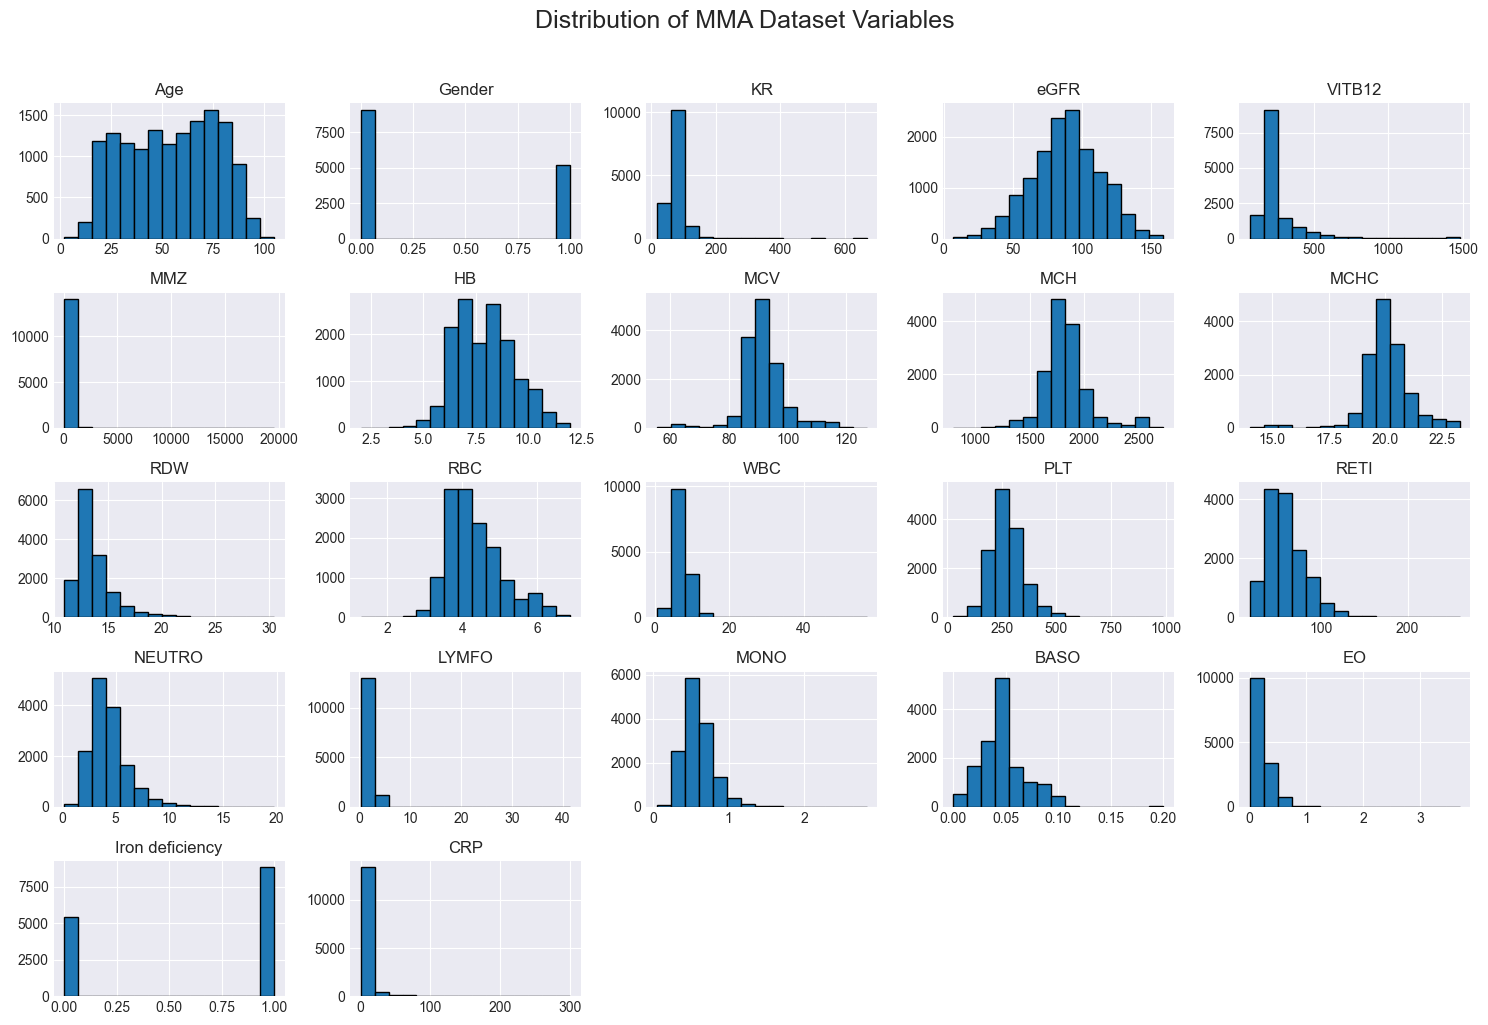

In [31]:

plt.style.use('seaborn-v0_8-darkgrid')
ax = df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of MMA Dataset Variables', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

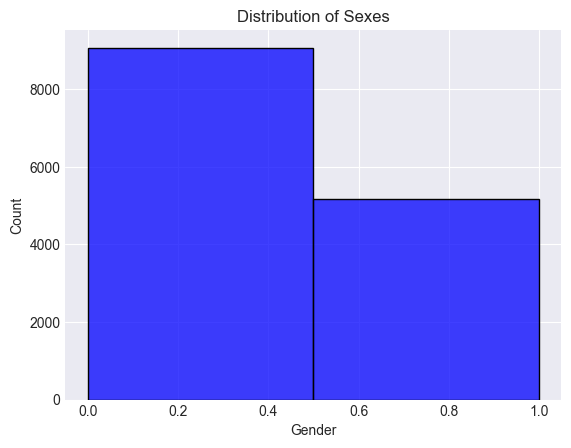

In [32]:
axs = sns.histplot(df["Gender"], kde=False, bins=2, color='blue')
axs.set_title("Distribution of Sexes");

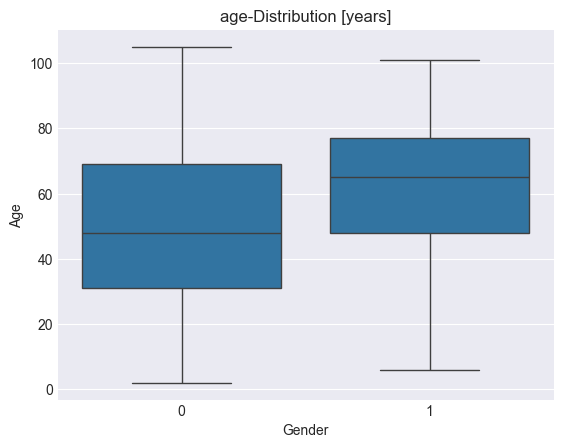

In [33]:
axs = sns.boxplot(data=df, x="Gender", y="Age")
axs.set_title("age-Distribution [years]");

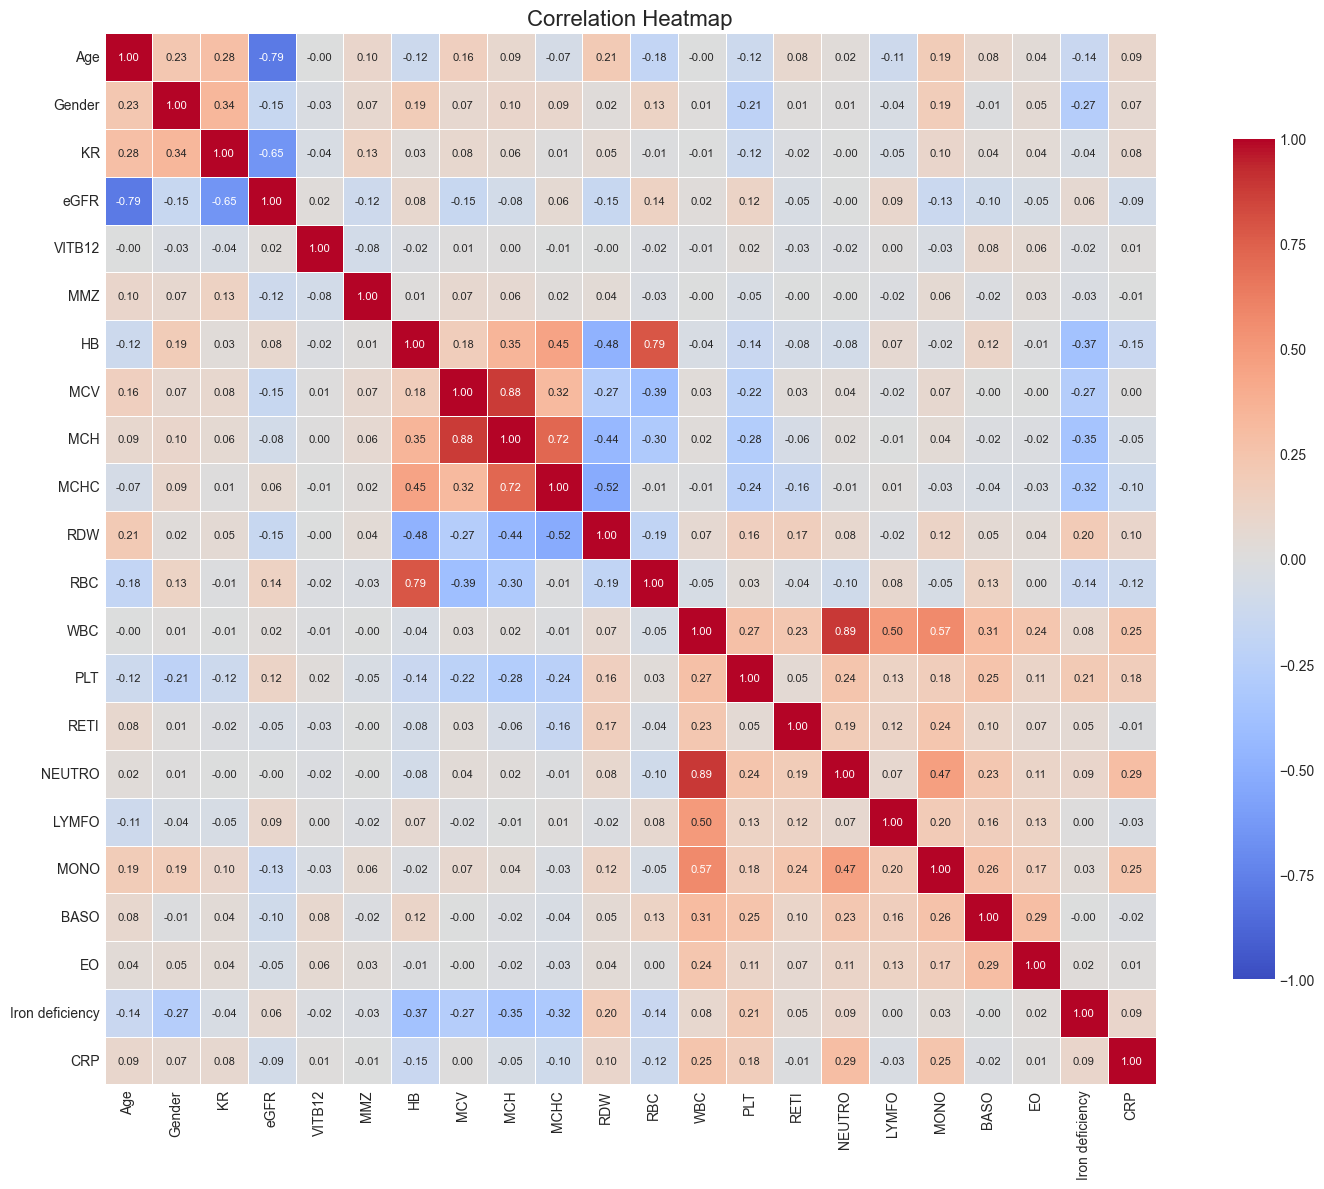

In [34]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    cbar=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 8},  # Smaller font for readability
    annot=True,       # Show correlation coefficients
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8},
    cmap="coolwarm",
)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()



The correlation heatmap provides critical insights into the relationships among the clinical variables and their potential relevance for predicting methylmalonic acid (MMA) levels. Moderate positive correlations were observed between MMA and hematological parameters, including hemoglobin (HB; r = 0.35), mean corpuscular hemoglobin (MCH; r = 0.28), and mean corpuscular hemoglobin concentration (MCHC; r = 0.27). These findings suggest that red blood cell indices may carry predictive information for MMA, possibly reflecting underlying nutritional or hematologic status. Weak correlations were also noted between MMA and age (r = 0.12) as well as eGFR (r = -0.02), highlighting the potential influence of renal function and age-related metabolic changes on MMA concentrations.

Although no single variable exhibited a strong linear correlation with MMA (|r| > 0.5), the combination of multiple weak-to-moderate predictors may improve model performance in a multivariate machine learning context. These findings informed the selection of features for model development, with a focus on hematological markers, iron deficiency status, renal function (eGFR), inflammatory markers (CRP, WBC), and demographic variables (age, gender). To address the high intercorrelations among certain features (e.g., HB, MCH, MCHC), multicollinearity was assessed, and regularization techniques (e.g., LASSO) were considered during model training to prevent redundancy and overfitting.

This feature selection strategy served as the foundation for developing a machine learning tool capable of interpreting elevated MMA levels in clinical practice, supporting decision-making by integrating complex biochemical and hematological patterns.

| Variable                         | Include? | Rationale                                          |
|----------------------------------|----------|----------------------------------------------------|
| Vitamin B12 (VITB12)             | Yes      | Direct biochemical relationship with MMA           |
| eGFR                             | Yes      | MMA clearance via kidneys                          |
| Age                              | Yes      | MMA rises with age                                 |
| Iron deficiency                  | Yes      | Impacts erythropoiesis and metabolism              |
| Hemoglobin (HB)                  | Yes      | Moderate correlation, anemia link                  |
| Mean Corpuscular Hemoglobin (MCH)| Yes      | Moderate correlation, possible additive value      |
| CRP                              | Maybe    | Weak correlation but may improve non-linear models |
| Gender                           | Maybe    | Categorical variable for potential bias correction |